In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
file_path = r"D:\Storage\PROJECTS\softwareEngg\BI\Projects\telecom_customer_churn\resources\Codes, Queries & DAX\prediction_data.xlsx"
sheet_name = "VW_churn_data"

data = pd.read_excel(file_path,sheet_name = sheet_name)
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   15776-UTT  Female   38     Yes   Uttar Pradesh                    1   
1   49302-GUJ  Female   47      No         Gujarat                   14   
2   39181-WES    Male   54     Yes     West Bengal                   10   
3   22915-MAH  Female   41     Yes     Maharashtra                   10   
4   76712-AND  Female   42      No  Andhra Pradesh                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19        NaN            No             No  ...   
1                 4        NaN            No             No  ...   
2                 7        NaN            No             No  ...   
3                23        NaN            No             No  ...   
4                 2        NaN            No             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal          45.05        2560.1           0.0   
1      Cre

In [ ]:
# data processing

In [4]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Confusion Matrix:
[[813  49]
 [110 230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       862
           1       0.82      0.68      0.74       340

    accuracy                           0.87      1202
   macro avg       0.85      0.81      0.83      1202
weighted avg       0.86      0.87      0.86      1202



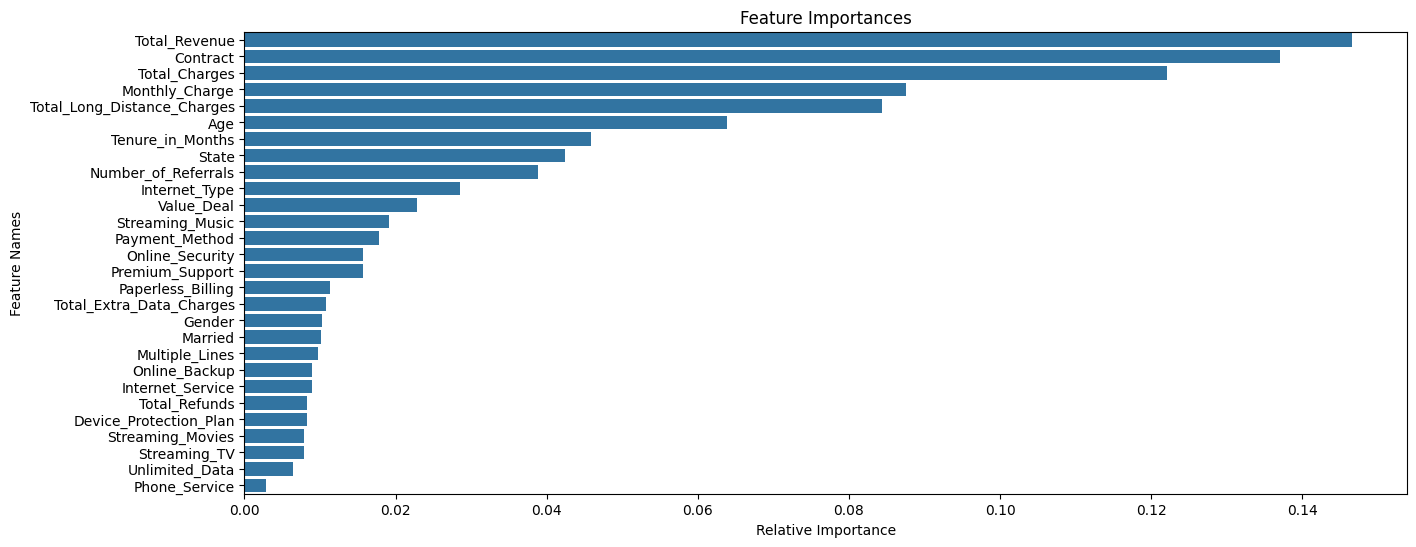

In [6]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()



Confusion Matrix:
[[813  49]
 [110 230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       862
           1       0.82      0.68      0.74       340

    accuracy                           0.87      1202
   macro avg       0.85      0.81      0.83      1202
weighted avg       0.86      0.87      0.86      1202



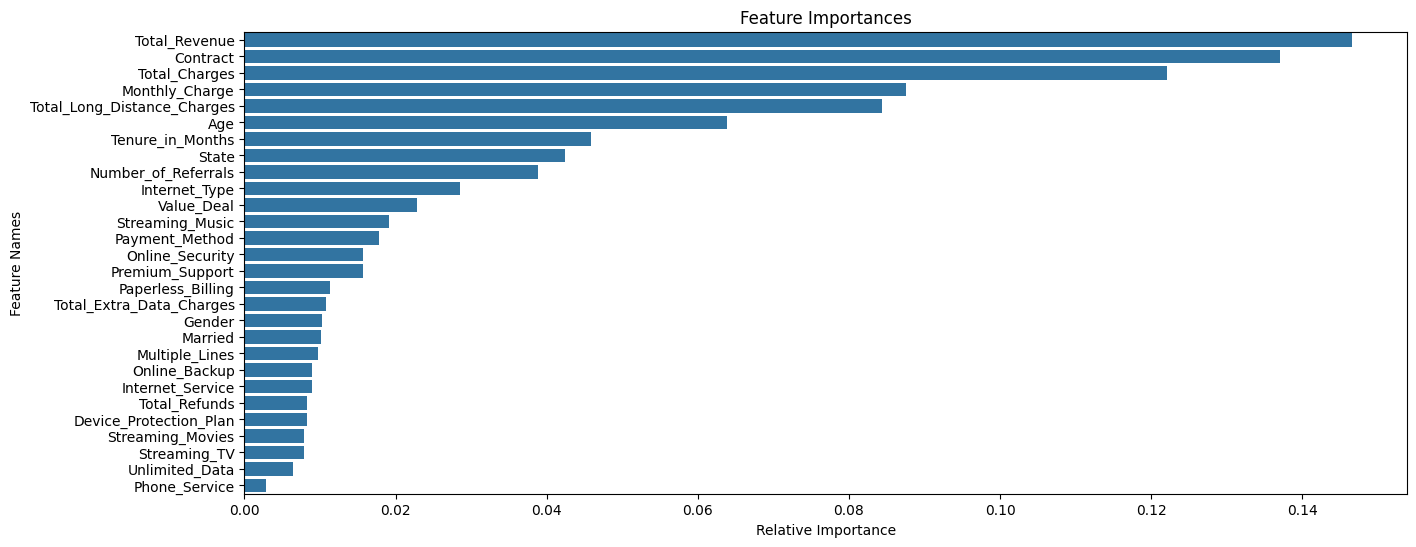

In [8]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()



In [11]:
# Define the path to the Joiner Data Excel file
#file_path = r""D:\Storage\PROJECTS\softwareEngg\BI\Projects\telecom_customer_churn\resources\Codes, Queries & DAX\prediction_data.xlsx""

# Define the sheet name to read data from
sheet_name = 'VW_join_data'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]
predicted_path = r"D:\Storage\PROJECTS\softwareEngg\BI\Projects\telecom_customer_churn\resources\Codes, Queries & DAX\predicted.xlsx"
# Save the results
original_data.to_excel(predicted_path, index=False)
 

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   57256-BIH  Female   18      No          Bihar                    9   
1   66612-KAR  Female   58     Yes      Karnataka                   11   
2   22119-WES    Male   31     Yes    West Bengal                    5   
3   53815-BIH  Female   36      No          Bihar                    2   
4   39764-UTT  Female   39     Yes  Uttar Pradesh                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7        NaN           Yes             No  ...   
1                18        NaN           Yes             No  ...   
2                 5        NaN           Yes             No  ...   
3                 4        NaN           Yes             No  ...   
4                14        NaN           Yes             No  ...   

  Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0    Credit Card          19.85         57.20           0.0   
1    Credit Card    